In [1]:
%run ../init.ipynb

In [2]:
res = (pd.read_pickle("./numeric_res.pickle")
       .groupby(["subsample", 'q'])
       .apply(lambda x:x.mean(skipna=False)[['last_loglik', 'N']]))

In [3]:
best_q = (res
 .reset_index()
 .groupby("subsample").apply(lambda x: x.loc[x['last_loglik'].idxmax()])
)

In [5]:
best_q['q_min'] = (res
 .reset_index()
 .groupby("subsample")
 .apply(lambda x: x[x['last_loglik'].isna()]['q'].max()).fillna(0)
)

In [6]:
geo_pal = sns.cubehelix_palette(15, rot=-.25, light=1, hue=0.0)
qpath_pal = sns.cubehelix_palette(15, rot=-.25, light=0.9)

In [7]:
pal = sns.color_palette('muted')

saved to qbest_qmin.pdf


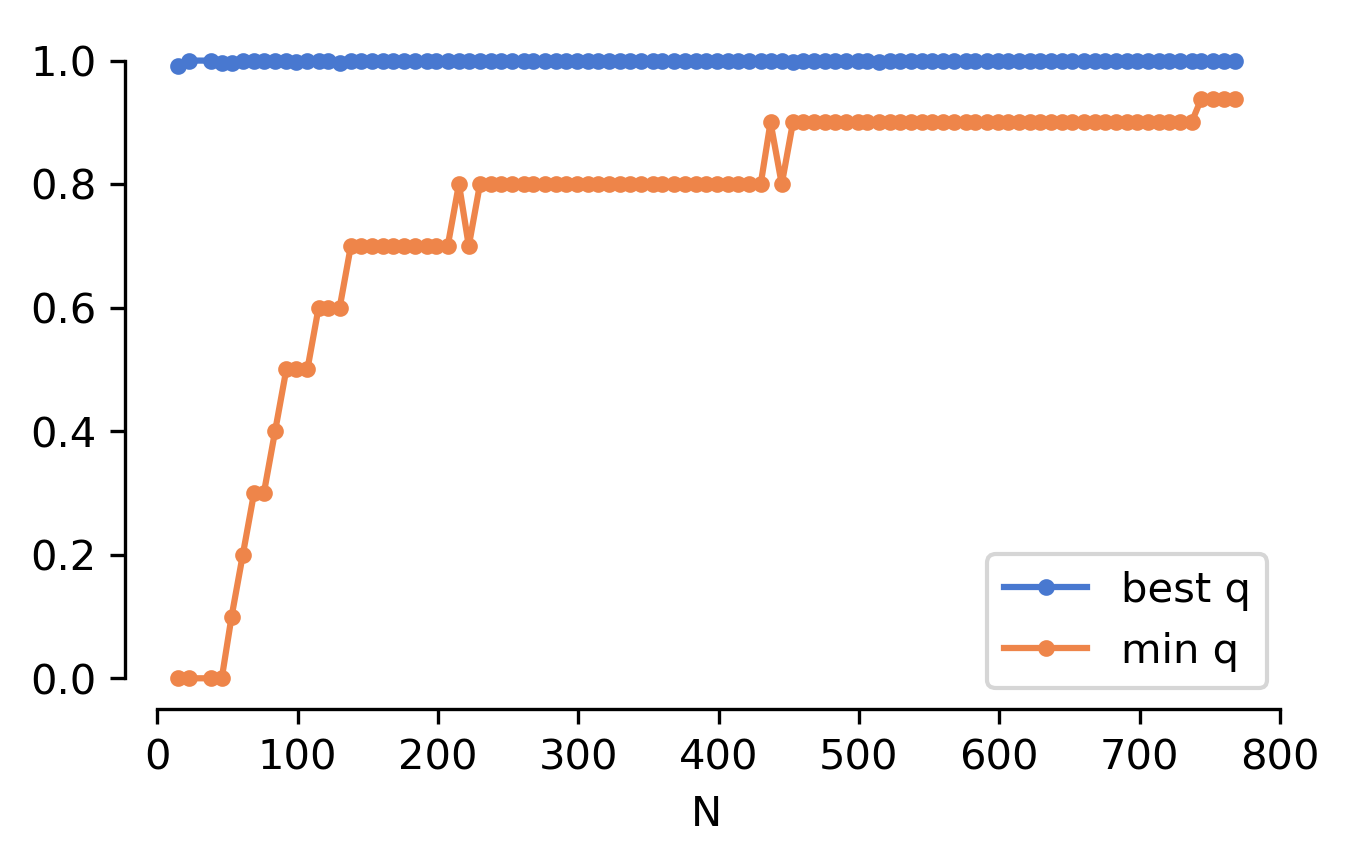

In [8]:
fig, ax = plt.subplots(1, 1, dpi=150, figsize=(5, 3))

df = (best_q[['q', 'q_min', 'N']]
      .rename_column('q','q_best')
      .drop([0.01, 0.04])) # outliers

line1 = df.plot(x="N",
        y='q_best',
        ax=ax,
        marker='.',
        color=[pal[0]],
        label='best q')


line2 = df.plot(x="N",
        y='q_min',
        ax=ax,
        marker='.',
        color=[pal[1]],
        label='min q')

sns.despine(ax=ax, trim=True)


plot_dir = Path('.')
filename = plot_dir / f"qbest_qmin.pdf"
fig.savefig(filename, bbox_inches='tight')
print('saved to {}'.format(filename))